In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rent_db = pd.read_json('./train.json')

In [2]:
rent_db.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [3]:
rent_db.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


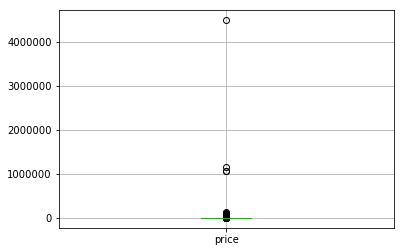

In [4]:
rent_db.boxplot(column='price')

Clearly, we have some crazy outliers here. I need to throw these outliers out, as I don't think they'll be useful to the analysis.

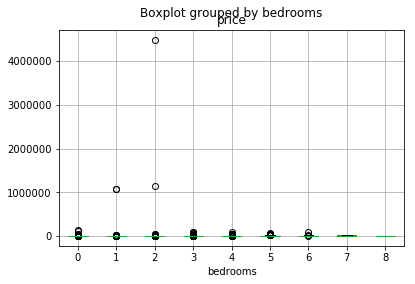

In [5]:
rent_db.boxplot(column='price', by='bedrooms')

In [6]:
rent_db.sort_values(by='price',ascending=False, inplace=True)
rent_db.head(20)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
32611,1.0,2,cd25bbea2af848ebe9821da820b725da,2016-06-24 05:02:11,,Hudson Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",low,40.7299,7208764,-74.0071,d1737922fe92ccb0dc37ba85589e6415,[],4490000,421 Hudson Street
12168,1.0,2,5d3525a5085445e7fcd64a53aac3cb0a,2016-06-24 05:02:58,,West 116th Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",low,40.8011,7208794,-73.9480,d1737922fe92ccb0dc37ba85589e6415,[],1150000,40 West 116th Street
55437,1.0,1,37385c8a58176b529964083315c28e32,2016-05-14 05:21:28,,West 57th Street,"[Doorman, Cats Allowed, Dogs Allowed]",low,40.7676,7013217,-73.9844,8f5a9c893f6d602f4953fcc0b8e6e9b4,[],1070000,333 West 57th Street
57803,1.0,1,37385c8a58176b529964083315c28e32,2016-05-19 02:37:06,This 1 Bedroom apartment is located on a prime...,West 57th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.7676,7036279,-73.9844,18133bc914e6faf6f8cc1bf29d66fc0d,[https://photos.renthop.com/2/7036279_924b52f0...,1070000,333 West 57th Street
123877,0.0,0,b9c72643feb2652536a898a5f13d2543,2016-04-12 02:11:10,"Originally built in 1862, this extraordinary l...",Duane Street,"[Elevator, Pre-War, Terrace, Dogs Allowed, Cat...",low,40.7161,6857401,-74.0080,d98acd4fa3c463bd468603bd873cc54c,[https://photos.renthop.com/2/6857401_a4a4c2f2...,135000,144 Duane Street
4620,1.0,0,c0d27c9422c375c651baa7b61e4a9dca,2016-06-07 17:35:10,The BEST DEAL!!!!!\r\rBeautiful Studio in a ni...,Van Horn St and 57th ave,"[Elevator, Laundry In Building, Balcony]",high,40.7323,7122037,-73.8761,3d7ef07518d7564ab1c55f6fa7c80527,[https://photos.renthop.com/2/7122037_531f0877...,111111,57-25 Van Horn St
91709,6.0,6,d20bce0bc08b2731f726067a1e501162,2016-04-16 02:22:15,MANSION IN THE SKY!!! This six-bedroom full-fl...,230 West 56th Street,"[Doorman, Elevator, Furnished, Laundry in Unit...",low,40.7654,6881666,-73.9822,37ffeac28297e956deecd7b31940c6e7,[https://photos.renthop.com/2/6881666_bedcd181...,100000,230 West 56th Street
54148,3.0,3,e69036ae9c8d47cbe57701d12af4dc6e,2016-05-03 02:20:32,The Towers of Waldorf Astoria Hotel offer eleg...,East 50th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.7565,6955433,-73.9726,161a1a797a1e57f6ba979447a0eadf94,[https://photos.renthop.com/2/6955433_2109e252...,90000,100 East 50th Street
116586,5.0,4,b9c72643feb2652536a898a5f13d2543,2016-04-02 02:26:43,144 DUANE STREET is a luxury rental building w...,144 Duane Street,"[Fireplace, Elevator, Pre-War, Terrace, Laundr...",low,40.7161,6813319,-74.0080,bc0a62f2e200eadf5f74037100af8f21,[https://photos.renthop.com/2/6813319_bc0e18ca...,85000,144 Duane Street
96905,3.0,3,e69036ae9c8d47cbe57701d12af4dc6e,2016-04-04 02:10:12,The Towers of Waldorf Astoria Hotel offer eleg...,East 50th Street,"[Doorman, Elevator, Furnished, Pre-War, Dogs A...",low,40.7565,6820053,-73.9726,c23e16813063cb363bdd2904bd20d2d0,[https://photos.renthop.com/2/6820053_1feb8e2a...,80000,100 East 50th Street


In [7]:
rent_db2 = rent_db[rent_db.price < 1000000]
rent_db2.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
123877,0.0,0,b9c72643feb2652536a898a5f13d2543,2016-04-12 02:11:10,"Originally built in 1862, this extraordinary l...",Duane Street,"[Elevator, Pre-War, Terrace, Dogs Allowed, Cat...",low,40.7161,6857401,-74.0080,d98acd4fa3c463bd468603bd873cc54c,[https://photos.renthop.com/2/6857401_a4a4c2f2...,135000,144 Duane Street
4620,1.0,0,c0d27c9422c375c651baa7b61e4a9dca,2016-06-07 17:35:10,The BEST DEAL!!!!!\r\rBeautiful Studio in a ni...,Van Horn St and 57th ave,"[Elevator, Laundry In Building, Balcony]",high,40.7323,7122037,-73.8761,3d7ef07518d7564ab1c55f6fa7c80527,[https://photos.renthop.com/2/7122037_531f0877...,111111,57-25 Van Horn St
91709,6.0,6,d20bce0bc08b2731f726067a1e501162,2016-04-16 02:22:15,MANSION IN THE SKY!!! This six-bedroom full-fl...,230 West 56th Street,"[Doorman, Elevator, Furnished, Laundry in Unit...",low,40.7654,6881666,-73.9822,37ffeac28297e956deecd7b31940c6e7,[https://photos.renthop.com/2/6881666_bedcd181...,100000,230 West 56th Street
54148,3.0,3,e69036ae9c8d47cbe57701d12af4dc6e,2016-05-03 02:20:32,The Towers of Waldorf Astoria Hotel offer eleg...,East 50th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.7565,6955433,-73.9726,161a1a797a1e57f6ba979447a0eadf94,[https://photos.renthop.com/2/6955433_2109e252...,90000,100 East 50th Street
116586,5.0,4,b9c72643feb2652536a898a5f13d2543,2016-04-02 02:26:43,144 DUANE STREET is a luxury rental building w...,144 Duane Street,"[Fireplace, Elevator, Pre-War, Terrace, Laundr...",low,40.7161,6813319,-74.0080,bc0a62f2e200eadf5f74037100af8f21,[https://photos.renthop.com/2/6813319_bc0e18ca...,85000,144 Duane Street


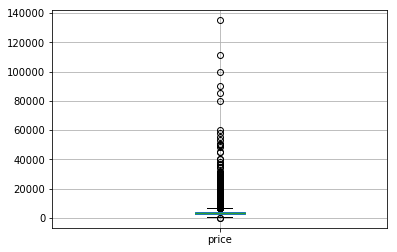

In [8]:
rent_db2.boxplot(column='price')

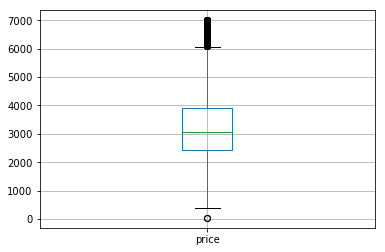

In [9]:
rent_db3 = rent_db2[rent_db2.price < 7000]
rent_db3.boxplot(column='price')

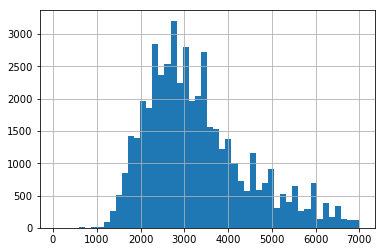

In [10]:
rent_db3.price.hist(bins=50)

In [11]:
rent_db3.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,46989.000000,46989.000000,46989.000000,4.698900e+04,46989.000000,46989.000000
mean,1.150365,1.469259,40.742466,7.023732e+06,-73.957306,3302.378535
std,0.387096,1.066536,0.597636,1.262478e+05,1.102895,1173.460677
min,0.000000,0.000000,0.000000,6.811957e+06,-118.271000,43.000000
25%,1.000000,1.000000,40.727900,6.915612e+06,-73.991700,2450.000000
50%,1.000000,1.000000,40.751600,7.020232e+06,-73.977800,3065.000000
75%,1.000000,2.000000,40.773900,7.128340e+06,-73.954400,3900.000000
max,10.000000,8.000000,44.603800,7.753784e+06,0.000000,6999.000000


Well, after some slicing and dicing on price, aka some trial and error, I found my cutoff for price ($7000). By cutting out all of the listings that are more than $7000 per month, I am down to 46,989 rows from the ~49k at start. The histogram of price is more or less normally distributed. I'll move forward with this data set, as I perform my analysis. 

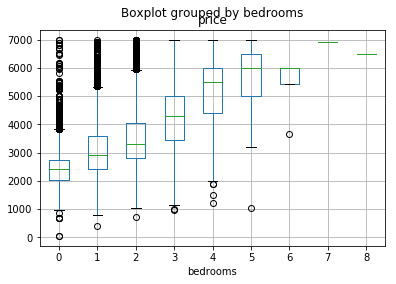

In [12]:
rent_db3.boxplot(column='price', by='bedrooms')

Not surprisingly, this plot shows how the median / mean price of apartments goes up with the amount of bedrooms within

### I want to do some work with the geo data, so I'm going to work on plotting the latitude longitude columns to see where these places are. Good practice, plus I think it'l look cool. (NYC)

In [13]:
rent_db.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'interest_level', 'latitude',
       'listing_id', 'longitude', 'manager_id', 'photos', 'price',
       'street_address'],
      dtype='object')

In [14]:
geo_db = rent_db3[['latitude','longitude', 'interest_level']].copy()

In [15]:
geo_db.head()

,latitude,longitude,interest_level
73465,40.7450,-73.9863,low
27216,40.7436,-73.9727,low
45555,40.7804,-73.9794,low
95670,40.7094,-74.0067,medium
123919,40.7094,-74.0067,low


In [16]:
geo_db.describe()

,latitude,longitude
count,46989.000000,46989.000000
mean,40.742466,-73.957306
std,0.597636,1.102895
min,0.000000,-118.271000
25%,40.727900,-73.991700
50%,40.751600,-73.977800
75%,40.773900,-73.954400
max,44.603800,0.000000


### After looking at a couple of examples, let's try using Basemap, and plotting on top of that. Afterward, maybe we can make an even fancier map with either Bokeh or datashader.

In [17]:
geo_db.dtypes

latitude          float64
longitude         float64
interest_level     object
dtype: object

In [18]:
def convert_int_lvl(txt_lvl):
    if txt_lvl == 'high':
        int_lvl = 2
    elif txt_lvl == 'medium':
        int_lvl = 1
    elif txt_lvl == 'low':
        int_lvl = 0
    return int_lvl

In [19]:
geo_db['interest_level'] = geo_db['interest_level'].apply(convert_int_lvl)

In [20]:
geo_db.dtypes

latitude          float64
longitude         float64
interest_level      int64
dtype: object

In [21]:
geo_db.head()

,latitude,longitude,interest_level
73465,40.7450,-73.9863,0
27216,40.7436,-73.9727,0
45555,40.7804,-73.9794,0
95670,40.7094,-74.0067,1
123919,40.7094,-74.0067,0


### This data is uses latitude and longitude, but I want to try to plot the points using datashader, which is built on bokeh. Bokeh uses google web mercator projections, so I have to convert my data to that format. Found a tutorial on how to do this using pyproj, so let's give it a go! 

In [22]:
from pyproj import Proj, transform

inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3857')
geo_db['x'], geo_db['y'] = transform(inProj, outProj, list(geo_db['latitude']), list(geo_db['longitude']))

In [23]:
geo_db.head()

,latitude,longitude,interest_level,x,y
73465,40.7450,-73.9863,0,4.535713e+06,-1.251001e+07
27216,40.7436,-73.9727,0,4.535557e+06,-1.250453e+07
45555,40.7804,-73.9794,0,4.539653e+06,-1.250723e+07
95670,40.7094,-74.0067,1,4.531750e+06,-1.251825e+07
123919,40.7094,-74.0067,0,4.531750e+06,-1.251825e+07


### Success!! I figured out how to convert the columns in one (well 3) lines of code. #high5, dinner time! Now to use datashader to plot all the apartment locations on a map of NYC. 

In [24]:
geo_db.isnull().sum()

latitude          0
longitude         0
interest_level    0
x                 0
y                 0
dtype: int64

In [25]:
import datashader as ds
import datashader.transfer_functions as tf
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:-2]

cvs = ds.Canvas(plot_width=600, plot_height=600)
agg = cvs.points(geo_db, 'x', 'y', ds.count('interest_level'))
img = tf.shade(agg, cmap=Greys9_r, how='log')

/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/datashader/core.py:94: RuntimeWarning: divide by zero encountered in true_divide
  return self.inverse_mapper((px - t)/s)
/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/datashader/core.py:94: RuntimeWarning: invalid value encountered in true_divide
  return self.inverse_mapper((px - t)/s)
/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/datashader/core.py:94: RuntimeWarning: divide by zero encountered in true_divide
  return self.inverse_mapper((px - t)/s)
/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/datashader/core.py:94: RuntimeWarning: invalid value encountered in true_divide
  return self.inverse_mapper((px - t)/s)


### Well, I ran out of time to submit for the kaggle competition, and I didn't get a chance to put much time into this project. I had fun doing some (really) basic exploratory work here, and I guess that's good practice. Once I ran into the issue with datashader, I decided to just call it, and move on to another project for now. 